In [1]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

Using TensorFlow backend.


15269888/15296311 [============================>.] - ETA: 0s

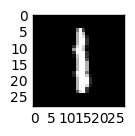

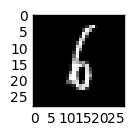

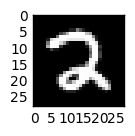

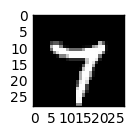

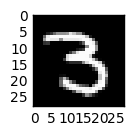

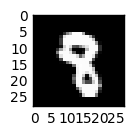

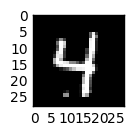

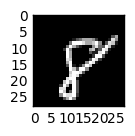

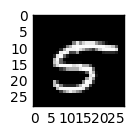

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
start = numpy.random.randint(0,X_train.shape[0]-9)
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[start+i].reshape((28,28)),cmap='gray',interpolation='none')
    plt.show()

In [36]:
def baseline_model():
    model = Sequential()
    model.add(Dense(num_pixels,input_dim=num_pixels,init='normal',activation='relu'))
    model.add(Dense(num_classes,init='normal',activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

model = baseline_model()
model.fit(X_train,y_train,validation_data=(X_test,y_test),nb_epoch=10,batch_size=200,verbose=2)
scores=model.evaluate(X_test,y_test,verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
5s - loss: 0.2776 - acc: 0.9211 - val_loss: 0.1406 - val_acc: 0.9589
Epoch 2/10
5s - loss: 0.1094 - acc: 0.9687 - val_loss: 0.0968 - val_acc: 0.9700
Epoch 3/10
5s - loss: 0.0713 - acc: 0.9794 - val_loss: 0.0831 - val_acc: 0.9740
Epoch 4/10
5s - loss: 0.0495 - acc: 0.9857 - val_loss: 0.0740 - val_acc: 0.9752
Epoch 5/10
5s - loss: 0.0364 - acc: 0.9895 - val_loss: 0.0658 - val_acc: 0.9785
Epoch 6/10
5s - loss: 0.0263 - acc: 0.9934 - val_loss: 0.0609 - val_acc: 0.9801
Epoch 7/10
6s - loss: 0.0184 - acc: 0.9955 - val_loss: 0.0611 - val_acc: 0.9804
Epoch 8/10
5s - loss: 0.0137 - acc: 0.9971 - val_loss: 0.0584 - val_acc: 0.9822
Epoch 9/10
5s - loss: 0.0109 - acc: 0.9977 - val_loss: 0.0581 - val_acc: 0.9817
Epoch 10/10
5s - loss: 0.0076 - acc: 0.9986 - val_loss: 0.0598 - val_acc: 0.9813
Baseline Error: 1.87%
